## SVM Checker

In [3]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools




def example(num_samples=10, num_features=2, grid_size=20):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.linear())
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ 0.21698154 -0.49964443]
 [-0.40558221  0.87570748]
 [-0.99657375 -0.58277734]
 [ 0.3752775   1.0594423 ]
 [-1.76927711 -0.8571479 ]
 [-2.38788471  0.86220058]
 [-0.83479885 -1.41184243]
 [-1.81833921 -0.68442264]
 [ 1.05995363 -1.17493077]
 [-1.20299034  1.44192644]]
     pcost       dcost       gap    pres   dres
 0: -2.2847e+00 -5.0609e+00  2e+01  4e+00  2e+00
 1: -2.8585e+00 -4.0308e+00  4e+00  7e-01  3e-01
 2: -2.0844e+00 -2.4695e+00  5e-01  3e-02  1e-02
 3: -2.3016e+00 -2.3275e+00  3e-02  1e-03  6e-04
 4: -2.3104e+00 -2.3106e+00  3e-04  1e-05  6e-06
 5: -2.3105e+00 -2.3105e+00  3e-06  1e-07  6e-08
 6: -2.3105e+00 -2.3105e+00  3e-08  1e-09  6e-10
Optimal solution found.


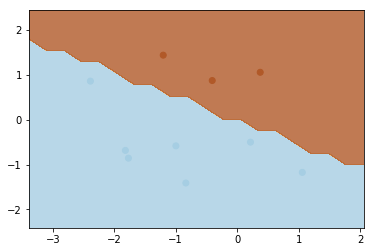

In [4]:
example()